In [1]:
## load training and test datasets using torchvision
## define a CNN
## loss func
## train
## test

In [23]:
import torch
import torch.nn as nn
import torchvision                          #torch中用来处理图像的库
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

#设置一些超参
num_epochs = 2        #训练的周期
batch_size = 4      #批训练的数量
learning_rate = 0.001 #学习率（0.1,0.01,0.001）

In [24]:
import os
os.environ['TORCH_HOME']='D:/dataset/'
#导入训练数据
train_dataset = datasets.MNIST(root='D:/dataset/',                #数据集保存路径
                               train=True,                      #是否作为训练集
                               transform=transforms.ToTensor(), #数据如何处理, 可以自己自定义
                               download=True)                  #路径下没有的话, 可以下载           
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, #分批
                                           batch_size=batch_size,
                                           shuffle=True)          #随机分批
#导入测试数据
test_dataset = datasets.MNIST(root='D:/dataset/',
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True,)   
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

classes = ('0','1', '2', '3', '4',
           '5', '6', '7', '8', '9')

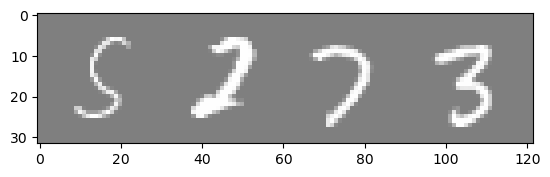

5     2     7     3    


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [26]:
##Define a Convolutional Neural Network
#MLP1
list_accuracy = []
neuron = []
for a in range(30, 301, 30):
    class MLP(nn.Module):                    #继承nn.module

        def __init__(self):
            super(MLP, self).__init__()      #继承的作用
            self.layer1 = nn.Linear(784,a) #hidden layer-300
            self.relu = nn.ReLU()
            self.layer2 = nn.Linear(a,10)  #ouput layer-10

        def forward(self,x):             #网络传播的结构
            x = x.reshape(-1, 28*28)
            x = self.layer1(x)
            x = self.relu(x)
            y = self.layer2(x)
            return y

    mlp = MLP() #类的实例化    
    
    ##Define a Loss function and optimizer
    loss_func = nn.CrossEntropyLoss()
    #optimizer = torch.optim.Adam(mlp.parameters(), lr=learning_rate)

    # criterion = nn.CrossEntropyLoss()  #交叉熵损失
    optimizer = torch.optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)


    ##Train the network
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, (images, labels) in enumerate(train_loader): ## get the inputs; data is a list of [inputs, labels]
            optimizer.zero_grad()    # zero the parameter gradients 清零梯度
            # forward + backward + optimize
            outputs = mlp(images)
            loss = loss_func(outputs, labels)
            loss.backward()                                #反向求梯度
            optimizer.step()

    #         # print statistics
    #         if (i+1) % 100 == 0: # print every 100 mini-batches
    #             print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))


#             running_loss += loss.item()
#             if i % 2000 == 1999:    
#                 print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
#                 running_loss = 0.0

    print('Finished Training')


    #Test the network on the test data
#     #display an image from the test set to look
#     dataiter = iter(test_loader)
#     images, labels = next(dataiter)

#     # print images
#     imshow(torchvision.utils.make_grid(images))
#     print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


#     #The outputs are energies for the 10 classes. 
#     #The higher the energy for a class, the more the network thinks that the image is of the particular class. 
#     #So, let’s get the index of the highest energy:
#     #测试模型
#     #mlp.eval()      #测试模式，关闭正则化
#     correct = 0
#     total = 0
#     for images, labels in test_loader:
#         outputs = mlp(images)
#         _, predicted = torch.max(outputs, 1)   #返回值和索引
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     print('测试准确率: {:.4f}'.format(100.0*correct/total))


    #Let us look at how the network performs on the whole dataset.
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = mlp(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images of {a} neurons: {100 * correct // total} %')
    accuracy = 100 * correct // total
    list_accuracy.append(accuracy)
    neuron.append(a)
    


    
    

#     # what are the classes that performed well, and the classes that did not perform well:
#     # prepare to count predictions for each class
#     correct_pred = {classname: 0 for classname in classes}
#     total_pred = {classname: 0 for classname in classes}

#     # again no gradients needed
#     with torch.no_grad():
#         for data in test_loader:
#             images, labels = data
#             outputs = mlp(images)
#             _, predictions = torch.max(outputs, 1)
#             # collect the correct predictions for each class
#             for label, prediction in zip(labels, predictions):
#                 if label == prediction:
#                     correct_pred[classes[label]] += 1
#                 total_pred[classes[label]] += 1


#     # print accuracy for each class
#     for classname, correct_count in correct_pred.items():
#         accuracy = 100 * float(correct_count) / total_pred[classname]
#         print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')



Finished Training
Accuracy of the network on the 10000 test images of 30 neurons: 94 %
Finished Training
Accuracy of the network on the 10000 test images of 60 neurons: 95 %
Finished Training
Accuracy of the network on the 10000 test images of 90 neurons: 95 %
Finished Training
Accuracy of the network on the 10000 test images of 120 neurons: 95 %
Finished Training
Accuracy of the network on the 10000 test images of 150 neurons: 95 %
Finished Training
Accuracy of the network on the 10000 test images of 180 neurons: 95 %
Finished Training
Accuracy of the network on the 10000 test images of 210 neurons: 95 %
Finished Training
Accuracy of the network on the 10000 test images of 240 neurons: 96 %
Finished Training
Accuracy of the network on the 10000 test images of 270 neurons: 95 %
Finished Training
Accuracy of the network on the 10000 test images of 300 neurons: 95 %


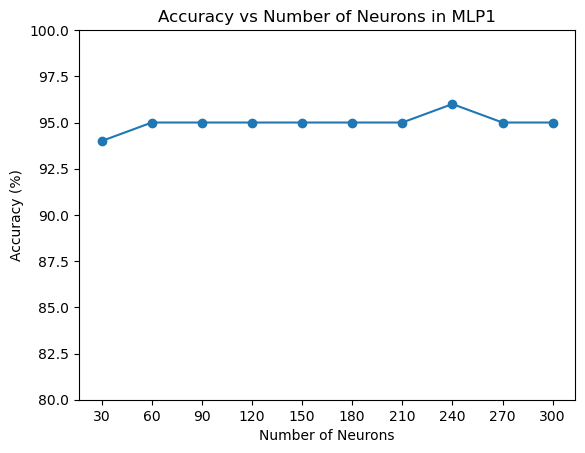

In [32]:

plt.plot(neuron, list_accuracy, marker='o')

# 设置图表标题和坐标轴标签
plt.title('Accuracy vs Number of Neurons in MLP1')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy (%)')

#设定y的范围
plt.ylim(80, 100)
# 设置 x 轴的刻度，以显示每隔 30 的数值
plt.xticks(range(min(neuron), max(neuron) + 1, 30))

# 显示图表
plt.show()

In [39]:
#Use PyTorch Profiler to characterize 
#execution time and memory consumption
from torch.profiler import profile, record_function, ProfilerActivity
#Using profiler to analyze memory consumption

with profile(activities=[ProfilerActivity.CPU],
        profile_memory=True, record_shapes=True) as prof:
    with record_function("model_inference"):
        mlp(images)

#print(prof.key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))
print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))

----------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                  Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
----------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
       model_inference        72.14%     844.000us       100.00%       1.170ms       1.170ms           0 b      -9.53 Kb             1  
          aten::linear         1.28%      15.000us        23.93%     280.000us     140.000us       4.84 Kb           0 b             2  
           aten::addmm        16.41%     192.000us        18.89%     221.000us     110.500us       4.84 Kb       4.84 Kb             2  
               aten::t         2.22%      26.000us         3.76%      44.000us      22.000us           0 b           0 b             2  
            aten::relu         1.11%     

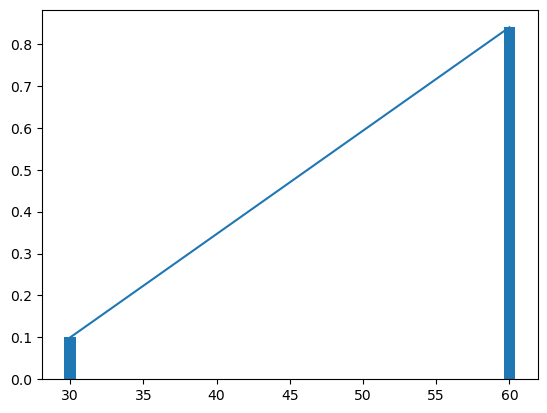

In [9]:

import matplotlib.pyplot as plt
list_accuracy = [0.1]
accuracy = float(42)/50
neuron = [30, 60]
list_accuracy.append(accuracy)

plt.plot(neuron, list_accuracy)
plt.bar(neuron, list_accuracy)
plt.show()